#Semillero AD Universidad EIA.

#Encuentro  #4.

#28.02.24

#Tema: Numpy III.


#Contenido:

1. Aspectos avanzados del trabajo con Ufuncs (aggregations)

2. Broadcasting: computaciones con arrays(Alternativa a la vectorizacion).




#1. Aspectos Avanzados del Trabajo con UFuncs.

Escribir el resultado de una operacion en la memoria. Las operaciones que hemos realizado son temporales.

Usamos el argumento out. Para operaciones con gran cantidad de computo hay una gran diferencia entre provisional(redirecionamiento muchas veces) y guardar en la memoria (redirecionamiento 1 vez).

In [ ]:
import numpy as np

x = np.arange(5)   #metodo de agregacion con argumento out escribe en memoria.
y = np.empty(5)     # concepto muy importante en Numpy.
np.multiply(x, 100, out=y)
print(y)

[  0. 100. 200. 300. 400.]


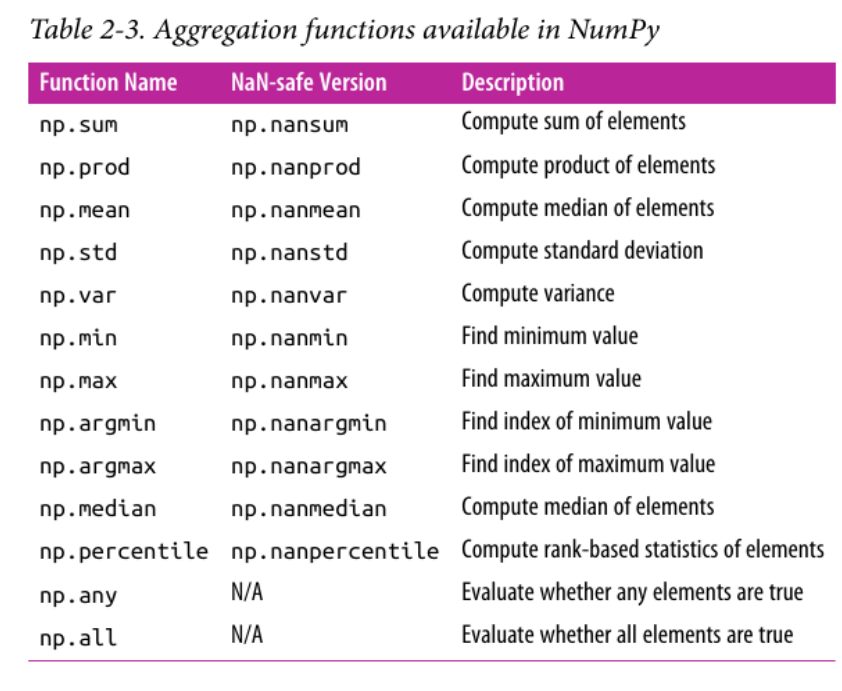

In [ ]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


 los metodos de agregacion permiten calcular sobre un objeto. Metodos reduce, accumulate.

In [ ]:
x = np.arange(1, 6)
print(x)
a = np.add.reduce(x)    #suma de componentes
print(a)
b = np.multiply.reduce(x)  #multiplicacion de componentes
print(b)
c = np.add.accumulate(x) #suma de componentes por acumulado
print(c)
d = np.multiply.accumulate(x)  #multiplicacion por acumulado
print(d)

[1 2 3 4 5]
15
120
[ 1  3  6 10 15]
[  1   2   6  24 120]


UFuncs pueden entregar el valor de producto de dos valores. Eso lo hacemos con el metodo outer- Muy util para crear matrices.

In [ ]:
x = np.arange(1, 6)
print(x)
b = np.multiply.outer(x, x)
print(b)

[1 2 3 4 5]
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


Los metodos de agregacion sirven para hallar maximos, minimos, promedios, desviaciones estandar, percentiles y  mucho mas.

In [ ]:
L = np.random.random(1000)
a = sum(L) #python
print(a)
b = np.sum(L) #numpy
print(b)

493.3899401579213
493.38994015792093


In [ ]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

82.6 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
452 µs ± 121 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Evaluacion de maximos y minimos

In [ ]:
min(big_array), max(big_array)

(3.704874380505707e-06, 0.9999988985758772)

In [ ]:
np.min(big_array), np.max(big_array)

(3.704874380505707e-06, 0.9999988985758772)

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

57.3 ms ± 952 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
430 µs ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
print(big_array.min(), big_array.max(), big_array.sum())
print(np.min(big_array), np.max(big_array), np.sum(big_array))

3.704874380505707e-06 0.9999988985758772 499771.52264395036
3.704874380505707e-06 0.9999988985758772 499771.52264395036


Agreacion multidimensional

In [ ]:
M = np.random.random((3, 4))
print(M)
print(M.sum())
print(np.sum(M))

[[0.00478111 0.56472616 0.12454019 0.58271257]
 [0.38093479 0.78916106 0.96732721 0.30462907]
 [0.89904535 0.91865055 0.93535907 0.17832403]]
6.650191173342133
6.650191173342133


In [ ]:
np.min(M, axis=1)  # minimo axis=1 en filas, axis=0 columnas

array([0.00478111, 0.30462907, 0.17832403])

In [ ]:
np.max(M, axis=0) # axis =0 para columnasmaximo en columnas, axis=1 para filas

array([0.89904535, 0.91865055, 0.96732721, 0.58271257])

#Ejemplo de uso de metodos de agregacion.

In [ ]:
!head -4 presidential_heights.csv

Name,Height,Greatness
George Washington,74,5
John Adams,67,3
Thomas Jefferson,75,5


In [ ]:
import pandas as pd
data = pd.read_csv('presidential_heights.csv')
#print(data)
print(data.head())
data.tail()

                Name  Height Greatness
0  George Washington      74         5
1         John Adams      67         3
2   Thomas Jefferson      75         5
3      James Madison      64         3
4       James Monroe      72         3


,Name,Height,Greatness
39,Ronald Reagan,74,1
40,George Bush I,74,NA
41,Bill Clinton,74,NA
42,George Bush II,71,NA
43,Barack Obama,73,NA


In [ ]:
heights = np.array(data['Height'])
print(heights)

[74 67 75 64 72 67 73 66 68 72 68 68 69 70 72 74 70 68 68 72 74 71 66 71
 67 70 72 71 72 70 71 74 69 70 72 75 72 72 69 74 74 74 71 73]


In [ ]:
print('Mean Height:       ', heights.mean())
print('Standard Deviation:', heights.std(ddof=1))
print('Minimum Height:    ', heights.min())
print('Maximum Height:    ', heights.max())
print('25th percentile:   ', np.percentile(heights, 25))
print('Median:            ', np.median(heights))
print('75th:              ', np.percentile(heights, 75))
print('IQR:              ', np.percentile(heights, 75) - np.percentile(heights, 25))

Mean Height:        70.70454545454545
Standard Deviation: 2.715841087368575
Minimum Height:     64
Maximum Height:     75
25th percentile:    68.75
Median:             71.0
75th:               72.25
IQR:               3.5


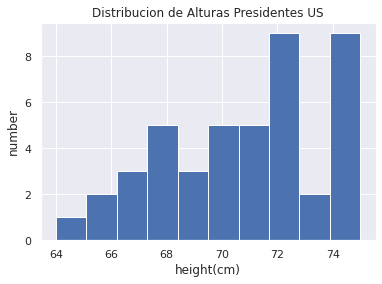

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.hist(heights)
plt.title('Distribucion de Alturas Presidentes US')
plt.xlabel('height(cm)')
plt.ylabel('number');
#plt.show()

#2. Broadcasting. Es un conjunto de reglas para aplicar bynary UFuncs sobre arreglos de diferentes dimensiones.

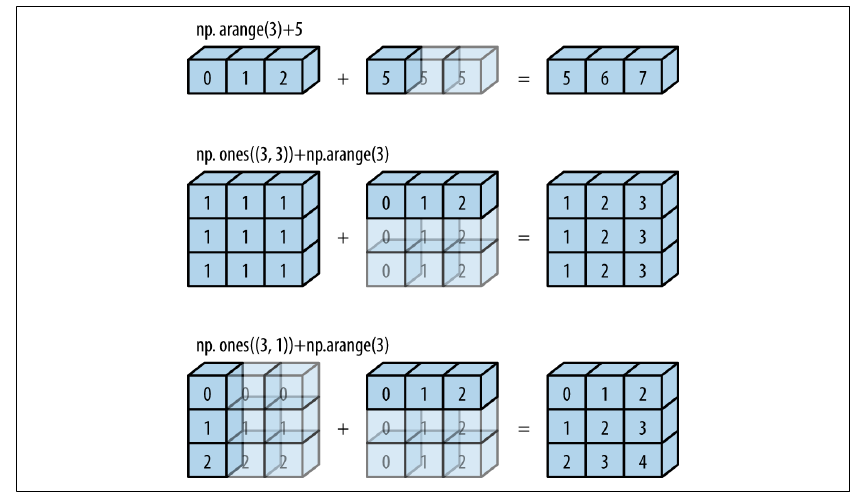

In [ ]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
print(a+b)
print(a+5)

[5 6 7]
[5 6 7]


In [ ]:
M = np.ones((3, 3))
print(M)
print(M+a)
print(a*M==M*a) #a 1x3, M 3x3
print(a+M==M+a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [ ]:
a = np.arange(3)
b = np.arange(3)
c = np.arange(3)[:, np.newaxis]
print(a)
print(c)
print(a+c)
print(a**c)
print(a+b)
print(a+c)
print(a*b==a*c)

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]
[[1 1 1]
 [0 1 2]
 [0 1 4]]
[0 2 4]
[[0 1 2]
 [1 2 3]
 [2 3 4]]
[[ True False False]
 [ True  True False]
 [ True False  True]]


In [ ]:
M = np.ones((2, 3)) #2x3 con 1x3 --> 2x3
a = np.arange(3)
print(M*a)
print(a*M==M*a)

[[0. 1. 2.]
 [0. 1. 2.]]
[[ True  True  True]
 [ True  True  True]]


In [ ]:
a = np.arange(3).reshape((3, 1)) #3x1 con 1x3 --> 3x3
b = np.arange(3)
print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [ ]:
M = np.ones((3, 2))
a = np.arange(3)
print(M+a)

ValueError: ignored

In [ ]:
M = np.ones((3, 2)).reshape((2, 3))
print(M+a)

[[1. 2. 3.]
 [1. 2. 3.]]


In [ ]:
a[:, np.newaxis].shape

(3, 1)

In [ ]:
M = np.ones((3, 2))
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [ ]:
b = np.logaddexp(M, a[:, np.newaxis]) #log(exp(a)+exp(b))
#b = np.logaddexp(M, a)
print(b)

ValueError: ignored

Utilizamos broadcasting para centrar un arreglo. Hacer que sus valores esten en cero.

In [ ]:
X = np.random.random((10, 3)) # Base de datos - resultado de 10 observaciones con 3 valores c/u.
print(X)
Xmean = X.mean(0) # aggregation. Valor promedio por columnas
#Xmean = X.mean(1) # Valor promedio por filas
#Xmean = X.mean() # Valor promedio total
print(Xmean)
X_centered = X - Xmean #operacion de broadcasting
print(X_centered)
print(X_centered.mean(0))


[[0.16282042 0.55447424 0.89357752]
 [0.83777178 0.71647098 0.92465986]
 [0.25905596 0.09841531 0.48808413]
 [0.00329992 0.76846535 0.93613722]
 [0.12005894 0.78023502 0.34984577]
 [0.95527174 0.80129854 0.23253912]
 [0.32555843 0.53607245 0.02414826]
 [0.18560104 0.21680522 0.80562618]
 [0.82610642 0.55267309 0.13124374]
 [0.26034639 0.33901359 0.6112753 ]]
[0.39358911 0.53639238 0.53971371]
[[-2.30768681e-01  1.80818598e-02  3.53863814e-01]
 [ 4.44182675e-01  1.80078606e-01  3.84946145e-01]
 [-1.34533142e-01 -4.37977069e-01 -5.16295829e-02]
 [-3.90289181e-01  2.32072971e-01  3.96423509e-01]
 [-2.73530162e-01  2.43842637e-01 -1.89867943e-01]
 [ 5.61682634e-01  2.64906162e-01 -3.07174585e-01]
 [-6.80306778e-02 -3.19930445e-04 -5.15565452e-01]
 [-2.07988068e-01 -3.19587161e-01  2.65912473e-01]
 [ 4.32517315e-01  1.62807111e-02 -4.08469967e-01]
 [-1.33242714e-01 -1.97378788e-01  7.15615886e-02]]
[ 1.11022302e-17 -2.22044605e-17 -2.22044605e-17]


# Ejemplo de uso de broadcasting para graficar  funciones.

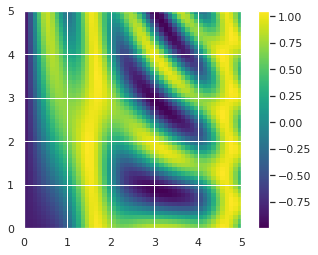

In [ ]:
# X y Y tienen 50 pasos desde 0 hasta 5
X = np.linspace(0, 5, 50)
#Y = np.linspace(0, 5, 50)
Y = np.linspace(0, 5, 50)[:, np.newaxis]
Z = np.sin(X)**10 + np.cos(10+Y*X)*np.cos(X) # aplicamos broadcasting
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(Z, origin='lower', extent=[0,5,0,5], cmap='viridis')
plt.colorbar();
#plt.show()

#Final Encuentro 4 !!!
________________________________________________________
